In [22]:
# Imports
import numpy as np 
import random
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix

In [23]:
# Convolution Layer
def gcn_layer(A, D, X, W):
    feature=D* A * D * X * W
    feature=np.maximum(0,feature)
    return feature
def computeweights(G):
    order = sorted(list(G.nodes()))
    #nx.draw(G, with_labels=True)
    A = nx.to_numpy_matrix(G, nodelist=order)
    I = np.eye(G.number_of_nodes())
    A_own = A + I
    D_own = np.array(np.sum(A_own, axis=0))[0]
    D_inv=D_own**-0.5
    #print(D_inv)
    D_inv = np.matrix(np.diag(D_inv))
    #print(D_inv)
    W1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 6))
    W2 = np.random.normal(loc=0, size=(W1.shape[1], 3))
    return A_own,D_inv,I,W1,W2

In [24]:
G= karate_club_graph()
A_own,D_inv,I,W1,W2 = computeweights(G)
H1 = gcn_layer(A_own, D_inv, I, W1)
H2 = gcn_layer(A_own, D_inv, H1, W2)
H2

matrix([[7.15901680e-01, 0.00000000e+00, 1.58125701e+00],
        [7.59541251e-01, 0.00000000e+00, 9.38324369e-01],
        [3.67526095e-01, 0.00000000e+00, 1.02732595e+00],
        [3.59510447e-01, 0.00000000e+00, 5.70721023e-01],
        [4.04460292e-01, 0.00000000e+00, 9.84253554e-01],
        [0.00000000e+00, 0.00000000e+00, 1.13508518e+00],
        [0.00000000e+00, 0.00000000e+00, 1.10894585e+00],
        [4.07027687e-01, 0.00000000e+00, 5.84044796e-01],
        [2.14250318e-01, 0.00000000e+00, 5.40616357e-01],
        [3.09094343e-01, 0.00000000e+00, 6.45378349e-01],
        [2.67024444e-01, 0.00000000e+00, 9.94351273e-01],
        [1.11602006e-01, 0.00000000e+00, 7.30585399e-01],
        [9.94460528e-02, 0.00000000e+00, 2.38883099e-01],
        [3.43610399e-01, 0.00000000e+00, 5.10063824e-01],
        [5.40419416e-02, 0.00000000e+00, 4.65311019e-01],
        [0.00000000e+00, 0.00000000e+00, 3.18245174e-01],
        [0.00000000e+00, 1.57213251e-01, 9.55707475e-01],
        [6.140

[ 2  8  9 14 15 18 20 22 23 24 25 26 27 28 29 30 31 32 33]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


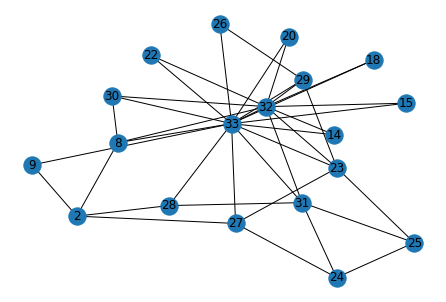

In [58]:
test= nx.petersen_graph() 
nx.draw_networkx(test) 
nx.draw(test, with_labels=True)
actual_node = np.array(sorted(list(test.nodes())))
print(actual_node)
predicted_node=np.zeros(len(actual_node))
print(predicted_node)

In [59]:
A_own,D_inv,I,W1,W2 = computeweights(test)
H11 = gcn_layer(A_own, D_inv, I, W1)
H21 = gcn_layer(A_own, D_inv, H11, W2)
H21

matrix([[1.10734302e+00, 2.77681865e-01, 1.55745360e-01],
        [8.69383293e-01, 2.68996910e-01, 0.00000000e+00],
        [8.21755808e-01, 3.01989116e-01, 1.77136251e-01],
        [7.90696196e-01, 0.00000000e+00, 0.00000000e+00],
        [7.71312843e-01, 0.00000000e+00, 0.00000000e+00],
        [8.05219853e-01, 6.57341218e-02, 0.00000000e+00],
        [5.04804707e-01, 9.54357470e-02, 0.00000000e+00],
        [7.79526652e-01, 2.37996917e-01, 1.39435281e-01],
        [5.63453433e-01, 1.25508243e-01, 3.46629169e-01],
        [2.49048313e-01, 3.48781522e-01, 4.06395419e-01],
        [2.06101161e-01, 4.31884114e-01, 4.78081601e-01],
        [4.03356120e-01, 7.00904842e-02, 3.90795053e-01],
        [6.57986870e-01, 4.18925731e-01, 7.35055435e-04],
        [7.51498697e-01, 3.68824296e-01, 6.75589323e-02],
        [5.88233466e-01, 8.49645805e-02, 2.83769473e-01],
        [7.41158239e-01, 1.22650330e-01, 0.00000000e+00],
        [4.90051491e-01, 3.55812093e-01, 3.52147643e-01],
        [1.584

In [85]:
similarity_matrix=H21*H2.T
max_value=np.array(similarity_matrix.max(1))
max_value[7]
#similarity_matrix.shape
#len(similarity_matrix)

array([0.77854746])

In [86]:
similarity_matrix[7,:]

matrix([[0.77854746, 0.72291817, 0.42974187, 0.35982662, 0.45252725,
         0.15827092, 0.15462618, 0.39872538, 0.24239483, 0.33093579,
         0.34680032, 0.18886612, 0.11082958, 0.33897436, 0.10700791,
         0.04437461, 0.17067561, 0.55989853, 0.04324559, 0.49838821,
         0.0786545 , 0.24536301, 0.05137961, 0.16100166, 0.38817425,
         0.33377959, 0.07471483, 0.25309096, 0.26792638, 0.07057343,
         0.19986702, 0.25881947, 0.32048458, 0.48319405]])

In [71]:
similarity_matrix

matrix([[1.03902217e+00, 9.87212371e-01, 5.66978706e-01, 4.86988536e-01,
         6.01169206e-01, 1.76784250e-01, 1.72713170e-01, 5.41681536e-01,
         3.21447084e-01, 4.42788147e-01, 4.50553252e-01, 2.37366989e-01,
         1.47325827e-01, 4.59934652e-01, 1.32312999e-01, 4.95652092e-02,
         1.92502273e-01, 7.70695722e-01, 4.83041339e-02, 6.79480304e-01,
         8.78549039e-02, 3.33339664e-01, 5.73896061e-02, 2.03558058e-01,
         5.18034583e-01, 4.38967794e-01, 8.37059105e-02, 3.36985329e-01,
         3.53688529e-01, 7.88285772e-02, 2.64473248e-01, 3.30533051e-01,
         4.18000486e-01, 6.29312712e-01],
        [6.22392960e-01, 6.60332474e-01, 3.19521046e-01, 3.12552376e-01,
         3.51631021e-01, 0.00000000e+00, 0.00000000e+00, 3.53863071e-01,
         1.86265647e-01, 2.68721457e-01, 2.32146591e-01, 9.70249195e-02,
         8.64567368e-02, 2.98729140e-01, 4.69831612e-02, 0.00000000e+00,
         4.22898787e-02, 5.33844285e-01, 0.00000000e+00, 4.51142938e-01,
         

In [68]:
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix[0])):
        if (similarity_matrix[i][j]==max_value[i]).all():
            predicted_node[i]=j
print(predicted_node)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Zachary's Karate Club
the number of components 1
------------
------------


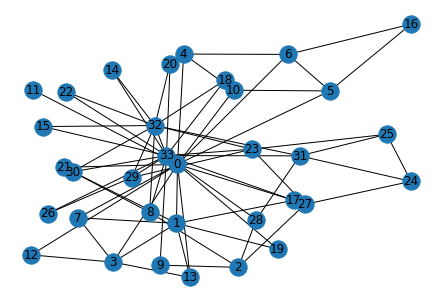

In [26]:
#Community Detection
# remove edge to construct subgraphs
def edge_to_remove(G):
    dict1=nx.edge_betweenness_centrality(G)
    list_of_tuples=dict1.items()
    list_of_tuples=sorted(list_of_tuples,key=lambda X:X[1],reverse=True)
    return list_of_tuples[0][0]
#Girvan Algorithm
def girvan(G):
    c=list(nx.connected_component_subgraphs(G))
    l=len(c)
    print("the number of components",l)
    while(l==1):
        G.remove_edge(*edge_to_remove(G))
        c=list(nx.connected_component_subgraphs(G))
        l=len(c)
        #print("the number of components",l)
    return c
G= nx.karate_club_graph()
print(G)
#print("Main Graph")
#nx.draw(G, with_labels=True)
c=girvan(G)
#print("Communities")
#nx.draw(G, with_labels=True)
for i in c:
    nx.draw(i, with_labels=True)
    A_own,D_inv,I,W1,W2 = computeweights(i)
    H11 = gcn_layer(A_own, D_inv, I, W1)
    H21 = gcn_layer(A_own, D_inv, H11, W2)
    H21
    print("------------")
#preperation of class label
y=np.zeros((G.number_of_nodes(),1))

k=0
for i in c:
    g1=list(i.nodes())
    for j in range(i.number_of_nodes()):
        y[g1[j]]=k
    #print("The Number of Nodes : ",i.number_of_nodes())
    #print(i.nodes())
    #print("---------")
    k=k+1
#print("Labels of class : ",y)

In [5]:
# Fully Connected Neural Network

# Class definition
class FullyConnectedNeuralNetwork:
    def __init__(self, x,y):
        self.input = np.array(x)
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    # Activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    # Derivative of sigmoid
    def sigmoid_derivative(self, x):
        return (x * (1 - x))  
    #Feed Forward
    def feedforward(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = self.sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
    #Backpropagation 
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*self.sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*
                     self.sigmoid_derivative(self.output), self.weights2.T)*self.sigmoid_derivative(self.layer1))
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    #Train
    def classfication(self):
        fo=np.zeros(self.output.shape)
        j=0
        for i in self.output:
            if i>=0.5:
                fo[j]=1
            else:
                fo[j]=0
            j=j+1
        return fo
    def train(self):
        for i in range(100000):
            self.output = self.feedforward()
            self.backprop()
        finaloutput=self.classfication()
        #for i in finaloutput:
        print("Weights1:")
        print(self.weights1)
        print("-------------")
        print("Weights2:")
        print(self.weights2)
        print("-------------")
        print("Predictive Output:")
        print(self.output.T)
        print("Predictive Output class:")
        print(finaloutput.T)
        print("Actual Output:")
        print(self.y.T)        

In [6]:
nn=FullyConnectedNeuralNetwork(H2,y)
nn.train()

Weights1:
[[ 68.3854465  -87.79439126  -7.20286626  -6.23675942]
 [-32.79297103  69.64227336  14.35446537  13.66279634]
 [-75.91808719  65.72544215 -11.05985061 -11.60168985]]
-------------
Weights2:
[[ 43.96707491]
 [-30.76196801]
 [ 20.80181236]
 [ 17.37445294]]
-------------
Predictive Output:
[[4.36778171e-14 4.36778179e-14 9.97513513e-01 4.36778171e-14
  4.36778367e-14 4.36778171e-14 4.36778171e-14 4.36798922e-14
  1.00000000e+00 1.00000000e+00 4.36778853e-14 4.36778265e-14
  4.36778173e-14 2.63548094e-02 1.00000000e+00 9.40383808e-01
  4.36778171e-14 3.58080298e-13 1.00000000e+00 5.13863353e-01
  4.88527350e-01 3.75337248e-02 1.00000000e+00 1.00000000e+00
  9.99393069e-01 9.99367186e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 9.96821360e-01
  9.99999999e-01 1.00000000e+00]]
Predictive Output class:
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Actual Output:
[[0. 0. 1. 0. 0. 0. 0. 0